In [10]:
# ---------------------------------------------
# 日本の銘柄はpandas_datareaderで読み込めないので、スクレイピングのメソッドを作って読み込み。
from ok_datareaderYahooJP import datareaderYahooJP
import datetime
import numpy as np

# 過去2か月間のデータを取得
from ok_datareaderYahooJP import datareaderYahooJP
end = datetime.datetime.today()
start = end - datetime.timedelta(days=35)
start_x = end - datetime.timedelta(days=30)

ucd = datareaderYahooJP(8057, start=start, end=end)
ucd_Close_ln = np.log(ucd.Close)

print('--- ucd.head() ---')
print(ucd.head())

# ---------------------------------------------
# 7日分日付を進める
from ok_setHistoricalDataAhead import setHistoricalDataAhead
#ucd_ahead = setHistoricalDataAhead(ucd, 7)
ucd_ahead = setHistoricalDataAhead(ucd, 0)
print('--- ucd_ahead.head() ---')
print(ucd_ahead.head())

#-----------------------------------------------
# ucd_aheadの終値の対数変化率を計算
ucd_ahead_Close_ln = np.log(ucd_ahead.Close)
print('--- calculate logarithm of ucd_ahead ---')
print(ucd_ahead_Close_ln.head())

#-----------------------------------------------
# 日毎の対数変化率の差分を取得
ucd_ahead_Close_ln_diff = ucd_ahead_Close_ln.diff().dropna()
print(ucd_ahead_Close_ln_diff.head())

--- ucd.head() ---
            Open  High   Low  Close  Volume  Adj Close
Date                                                  
2017-06-08  2599  2608  2573   2575   14800       2575
2017-06-09  2564  2584  2551   2576   25500       2576
2017-06-12  2576  2584  2566   2566    4100       2566
2017-06-13  2561  2581  2557   2573   11900       2573
2017-06-14  2566  2608  2556   2590   20100       2590
--- ucd_ahead.head() ---
            Open  High   Low  Close  Volume  Adj Close
Date                                                  
2017-06-08  2599  2608  2573   2575   14800       2575
2017-06-09  2564  2584  2551   2576   25500       2576
2017-06-12  2576  2584  2566   2566    4100       2566
2017-06-13  2561  2581  2557   2573   11900       2573
2017-06-14  2566  2608  2556   2590   20100       2590
--- calculate logarithm of ucd_ahead ---
Date
2017-06-08    7.853605
2017-06-09    7.853993
2017-06-12    7.850104
2017-06-13    7.852828
2017-06-14    7.859413
Name: Close, dtype: float

In [11]:
import csv

# ok_03_TOPIX.csvを読み込む
with open('ok_03_TOPIX.csv', 'r') as tpx:
    companyList = csv.reader(tpx)
    #header = next(companyList)  # ヘッダーを読み飛ばす

    for row in companyList:
        print(row)

['code', 'name', 'industry']
['1882', '東亜道', '建設業']
['2193', 'ＣＯＯＫＰＡＤ', 'サービス業']
['3443', '川田ＴＥＣＨ', '金属製品']
['4088', 'エア・ウォーター', '化学']
['4568', '第一三共', '医薬品']
['4661', 'ＯＬＣ', 'サービス業']
['5233', '太平洋セメ', 'ガラス・土石製品']
['6465', 'ホシザキ', '機械']
['6703', 'ＯＫＩ', '電気機器']
['7266', '今仙電機', '輸送用機器']
['7600', 'ＭＤＭ', '卸売業']
['7868', '広済堂', 'その他製品']
['8137', 'サンワテクノス', '卸売業']
['8166', 'タカキュー', '小売業']
['8173', '上新電', '小売業']
['8595', 'ジャフコ', '証券、商品先物取引業']
['9009', '京成', '陸運業']
['9306', '東陽倉', '倉庫・運輸関連業']
['9449', 'ＧＭＯ', '情報・通信業']
['9474', 'ゼンリン', '情報・通信業']


0.5	1882	 東亜道	 建設業
0.5	2193	 ＣＯＯＫＰＡＤ	 サービス業
0.5	3443	 川田ＴＥＣＨ	 金属製品
0.5	4088	 エア・ウォーター	 化学
0.5	4568	 第一三共	 医薬品
0.7	4661	 ＯＬＣ	 サービス業
0.6	5233	 太平洋セメ	 ガラス・土石製品
0.6	6465	 ホシザキ	 機械
0.6	6703	 ＯＫＩ	 電気機器
0.6	7266	 今仙電機	 輸送用機器
0.6	7600	 ＭＤＭ	 卸売業
0.5	7868	 広済堂	 その他製品
0.5	8137	 サンワテクノス	 卸売業
0.7	8166	 タカキュー	 小売業
0.5	8173	 上新電	 小売業
0.5	8595	 ジャフコ	 証券、商品先物取引業
0.6	9009	 京成	 陸運業
0.5	9306	 東陽倉	 倉庫・運輸関連業
0.6	9449	 ＧＭＯ	 情報・通信業
0.6	9474	 ゼンリン	 情報・通信業


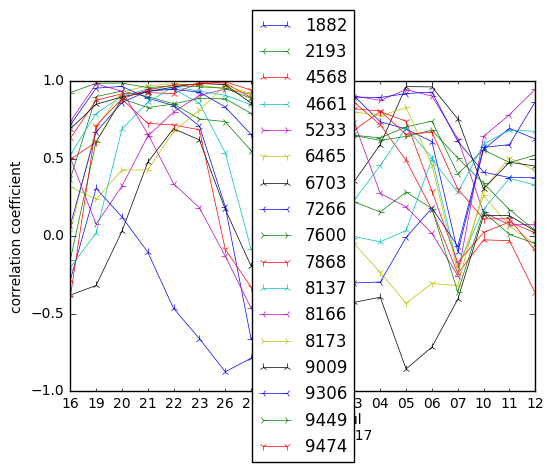

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import pandas as pd

# ok_03_TOPIX.csvを読み込む
with open('ok_03_TOPIX.csv', 'r') as tpx:
    companyList = csv.reader(tpx)
    header = next(companyList)  # ヘッダーを読み飛ばす
    fig_1 = plt.figure()
    g_1=fig_1.add_subplot(1,1,1)
    g_1.set_xlim([start_x, end])
    g_1.set_ylim([-1, 1])
    g_1.set_ylabel('correlation coefficient')

    i = 0
    dreamTeam = []
    for row in companyList:
        i += 1
        # 時系列データを取得
        data = datareaderYahooJP(row[0], start=start, end=end)
        # 終値の対数変化率を取得
        data_Close_ln = np.log(data.Close)
        # 対数変化率の日毎の差分を取得
        data_Close_ln_diff = data_Close_ln.diff().dropna()
        # 相関を計算
        correlation = ucd_ahead_Close_ln_diff.corr(data_Close_ln_diff)
        # 表示
        print(str(round(correlation,1)) + '\t' + row[0] + '\t' + u' ' + row[1] + '\t'  + u' ' + row[2])
        # 描画
        if correlation >= 0.5 or correlation <= -0.5:
            dreamTeam.append(row)
            pd.Series.rolling(ucd_ahead_Close_ln, window=7).corr(data_Close_ln).dropna().plot(ax=g_1, style=str(i%4 + 1) + '-',linewidth=0.5, label=row[0])        
            g_1.legend(loc='center')


In [ ]:
fig_2 = plt.figure()
g_2=fig_2.add_subplot(1,1,1)
g_2.set_xlim([start_x, end])

ucd_Close_ln.plot(ax=g_2, style='o-',linewidth=0.5, label='UCD Log')

fig_3 = plt.figure()
g_3=fig_3.add_subplot(1,1,1)
g_3.set_xlim([start_x, end])

ucd.Close.plot(ax=g_3, style='o-',linewidth=0.5, label='UCD')

j = 0
for row in dreamTeam:
    # 時系列データを取得
    data = datareaderYahooJP(row[0], start=start, end=end)
    # 終値の対数変化率を取得
    data_Close_ln = np.log(data.Close)
    # 表示
    print(row[0] + '\t' + u' ' + row[1] + '\t'  + u' ' + row[2])    
    #描画
    j += 1
    data_Close_ln.plot(ax=g_2, style=str(j%4 + 1) + '-', linewidth=0.5, label=row[0]) 
    g_2.legend(loc='upper left')
    #描画
    j += 1
    data.Close.plot(ax=g_3, style=str(j%4 + 1) + '-', linewidth=0.5, label=row[0]) 
    g_3.legend(loc='upper left')    
    